<a href="https://colab.research.google.com/github/alexandresuehiro/dio-bootcamps/blob/main/metrics_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images.shape, test_images.shape

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [9]:
train_images, test_images = train_images/255.0, test_images/255.0

classes = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/")

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.9247 - loss: 0.1975 - val_accuracy: 0.9058 - val_loss: 0.2556
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9312 - loss: 0.1867 - val_accuracy: 0.9096 - val_loss: 0.2592
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9345 - loss: 0.1725 - val_accuracy: 0.9104 - val_loss: 0.2645
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9414 - loss: 0.1542 - val_accuracy: 0.9134 - val_loss: 0.2674
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9479 - loss: 0.1381 - val_accuracy: 0.9084 - val_loss: 0.2864


In [16]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1) # Use np.argmax on model.predict output to get predicted classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


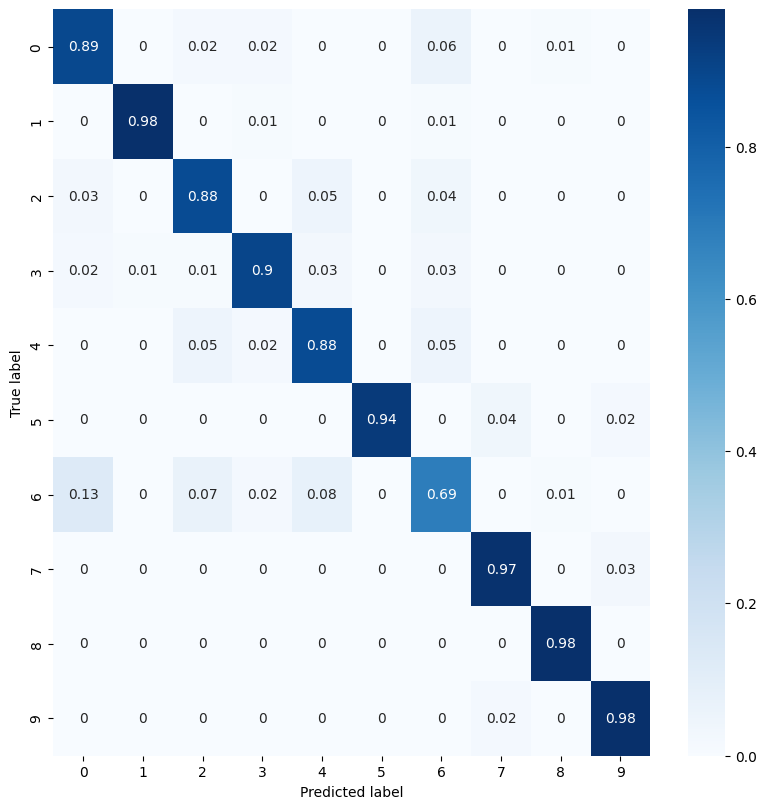

In [17]:
con_mat = tf.math.confusion_matrix(y_true, y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.7491 - loss: 0.6823 - val_accuracy: 0.8740 - val_loss: 0.3618
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.8807 - loss: 0.3335 - val_accuracy: 0.8851 - val_loss: 0.3181
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9030 - loss: 0.2686 - val_accuracy: 0.8961 - val_loss: 0.2900
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9141 - loss: 0.2388 - val_accuracy: 0.8999 - val_loss: 0.2733
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9224 - loss: 0.2142 - val_accuracy: 0.8982 - val_loss: 0.2749


In [21]:
TP = con_mat[1,1]
TN = con_mat[0,0]
FP = con_mat[0,1]
FN = con_mat[1,0]

Sensitivity = TP / (TP + FN)
Specificity = TN / (TN + FP)
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_Score = 2 * Precision * Recall / (Precision + Recall)

print(f"Sensitivity: {Sensitivity}")
print(f"Specificity: {Specificity}")
print(f"Accuracy: {Accuracy}")
print(f"Precision: {Precision}")
print(f"Recall: {Recall}")
print(f"F1 Score: {F1_Score}")

Sensitivity: 0.996938775510204
Specificity: 0.9977528089887641
Accuracy: 0.9973262032085561
Precision: 0.9979570990806946
Recall: 0.996938775510204
F1 Score: 0.9974476773864217
